In [1]:
import PSILOGIT
import numpy as np

# 1) Define the settings of your experiment

In [2]:
model = PSILOGIT.PSILOGIT(np.zeros(4),0.7, n=10)

# 2) Sample states

### 2.1) Rejection sampling

In [3]:
states = model.SEI_by_sampling(model.sig, nb_ite=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

## 2.2) Simulated Annealing

In [10]:
states, ls_FNR = model.SEI_SLR(total_length_SEISLR_path=3000, backup_start_time=1000, random_start=False, conditioning_signs=False)

## 2.3) Figures to study the sampling from simulated annealing

In [4]:
nbM_admissibles, ls_states_admissibles = model.compute_selection_event()

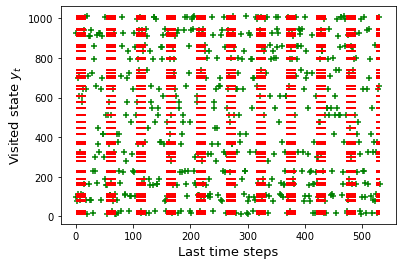

In [5]:
model.last_visited_states(states, ls_states_admissibles)

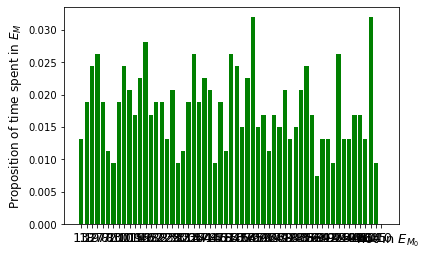

In [6]:
model.histo_time_in_selection_event(states, ls_states_admissibles)

# 3) Hypothesis Testing

## 3.0) Estimation of the conditional mean (under the null)

In [7]:
tildeGN12, barpi = model.params_saturated(model.sig, states)

  0%|          | 0/532 [00:00<?, ?it/s]

## 3.1) SIGLE

In [8]:
lspvals_selec, lspvals_sat, gaps = model.pval_SIGLE(states, barpi, l2_regularization=10, grad_descent={'lr':0.01,'return_gaps':True,'max_ite':100}, calibrated_from_samples=False, statesnull=None)

  0%|          | 0/532 [00:00<?, ?it/s]

## 3.2) Taylor's procedure

In [9]:
gamma = np.zeros(len(model.M))
gamma[0] = 1
lspvals_tay = model.pval_taylor(states, thetanull=np.zeros(model.X.shape[1]), gamma=gamma)

  0%|          | 0/532 [00:00<?, ?it/s]

## 3.3) Weak Learner

In [10]:
lspvals_naive = model.pval_weak_learner(states[:200], states[:200], barpi, signull=np.zeros(model.X.shape[0]))

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

## 3.4) p-values

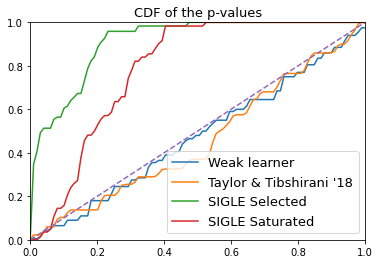

In [11]:
lists_pvalues = [lspvals_naive, lspvals_tay, lspvals_selec, lspvals_sat]
names = ['Weak learner', "Taylor & Tibshirani '18", 'SIGLE Selected', 'SIGLE Saturated']
model.plot_cdf_pvalues(lists_pvalues, names, states = states[:200], sigalt=np.zeros(model.X.shape[0]), figname=None)